In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
players = pd.read_csv("D:\development\Python\DataSet\players_22.csv")

C:\Users\prate\AppData\Local\Temp\ipykernel_27176\1811018879.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("D:\development\Python\DataSet\players_22.csv")


In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [18]:
players = players.dropna(subset = features)

In [19]:
data = players[features].copy()

In [20]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

In [21]:
data = ((data - data.min())/(data.max() - data.min())) * 9 + 1

In [22]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
data

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667
...,...,...,...,...,...
19234,1.000000,1.586957,1.012876,1.002830,3.000000
19235,1.000000,2.956522,1.000000,1.004686,2.000000
19236,1.000000,2.173913,1.000000,1.004222,2.666667
19237,1.000000,3.152174,1.000000,1.004686,2.000000


In [23]:
def random_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis = 1)

In [24]:
centroids = random_centroids(data,5)

In [25]:
centroids

,0,1,2,3,4
overall,3.934783,5.695652,2.173913,5.695652,5.891304
potential,6.478261,6.086957,2.565217,5.304348,7.456522
wage_eur,1.064378,1.012876,1.038627,1.012876,2.944206
value_eur,1.556309,1.110928,1.039017,1.010717,1.012341
age,6.666667,1.000000,4.000000,1.666667,5.000000


In [28]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis = 1)))
    return distances.idxmin(axis = 1)

In [32]:
labels = get_labels(data,centroids)

In [33]:
labels.value_counts() # shows the unique columns for each centroids

3    6403
0    4348
2    3809
4    3206
1    1399
dtype: int64

In [ ]:
# geographical mean " np.exp(np.log(x).mean())

In [34]:
data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean()))

,overall,potential,wage_eur,value_eur,age
0,5.055520,4.702163,1.117923,1.043483,5.935197
1,4.402044,6.969081,1.128565,1.123074,1.974911
2,3.017246,3.824793,1.025713,1.015295,3.515416
3,4.255745,5.513082,1.078043,1.059448,2.955563
4,6.555711,6.569115,1.737949,1.432767,4.612322


In [35]:
def new_centroid(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [36]:
from sklearn.decomposition import PCA # principle component analysis(5d to 2d)
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [43]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show() 

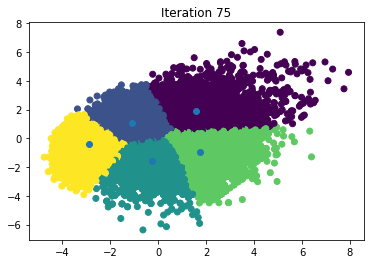

In [44]:
max_iternations = 100
k = 5

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iternations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroid(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [45]:
centroids

,0,1,2,3,4
overall,6.512569,4.318374,4.076277,5.466107,2.516946
potential,6.888703,5.870807,3.990572,5.121336,4.422514
wage_eur,1.713725,1.073262,1.046214,1.208573,1.016169
value_eur,1.485764,1.062302,1.026673,1.073411,1.013486
age,3.930392,2.685356,4.713518,5.886358,2.311268


In [46]:
players[labels == 0]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,244560,https://sofifa.com/player/244560/carlos-gutier...,C. Gutiérrez,Carlos Gutiérrez Estefa,"RM, LM",69,81,3400000.0,6000.0,22,...,48+2,48+2,48+2,56+2,16+2,https://cdn.sofifa.net/players/244/560/22_120.png,https://cdn.sofifa.net/teams/1881/60.png,https://cdn.sofifa.net/flags/mx.png,NaN,https://cdn.sofifa.net/flags/mx.png
6254,246139,https://sofifa.com/player/246139/ignacio-pena-...,Iñaki Peña,Ignacio Peña Sotorres,GK,69,80,2700000.0,29000.0,22,...,21+2,21+2,21+2,20+2,68+2,https://cdn.sofifa.net/players/246/139/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/es.png
6265,246918,https://sofifa.com/player/246918/jaume-grau-ci...,Jaume Grau,Jaume Grau Ciscar,"CDM, CM",69,78,2900000.0,10000.0,24,...,66+2,66+2,66+2,66+2,17+2,https://cdn.sofifa.net/players/246/918/22_120.png,https://cdn.sofifa.net/teams/479/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/es.png
6309,252150,https://sofifa.com/player/252150/patrick-willi...,Patrick William,Patrick William Sá De Oliveira,"CB, RB",69,77,2900000.0,4000.0,24,...,69+2,69+2,69+2,66+2,17+2,https://cdn.sofifa.net/players/252/150/22_120.png,https://cdn.sofifa.net/teams/10020/60.png,https://cdn.sofifa.net/flags/pt.png,NaN,https://cdn.sofifa.net/flags/br.png


In [49]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
6230,C. Gutiérrez,69,81,6000.0,3400000.0,22
6254,Iñaki Peña,69,80,29000.0,2700000.0,22
6265,Jaume Grau,69,78,10000.0,2900000.0,24
6309,Patrick William,69,77,4000.0,2900000.0,24


In [50]:
from sklearn.cluster import KMeans

In [51]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [52]:
centroids = kmeans.cluster_centers_

In [53]:
centroids

array([[3.60070865, 5.20709881, 1.03998962, 1.03584481, 2.71210567],
       [6.23238913, 6.62353016, 1.65767391, 1.41399853, 4.14155537],
       [4.80085965, 4.50385518, 1.11288546, 1.0400072 , 5.60892269]])

In [56]:
pd.DataFrame(centroids,columns = features).T

,0,1,2
overall,3.600709,6.232389,4.800860
potential,5.207099,6.623530,4.503855
wage_eur,1.039990,1.657674,1.112885
value_eur,1.035845,1.413999,1.040007
age,2.712106,4.141555,5.608923
